In [1]:
# TODO add pip installs (or a requirements.txt file)

In [2]:
#Libs
import numpy as np
import tensorflow as tf
import torch
import matplotlib.pyplot as plt
#From Other Files
from functions import *

2023-06-05 13:49:34.462005: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-05 13:49:34.464252: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-05 13:49:34.496314: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-05 13:49:34.496911: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-05 13:49:35.007082: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

### Import and Preprocess Data

In [3]:
#Data returns as np.ndarray(2000,16,15)
data = getData()
data.shape

(2000, 16, 15)

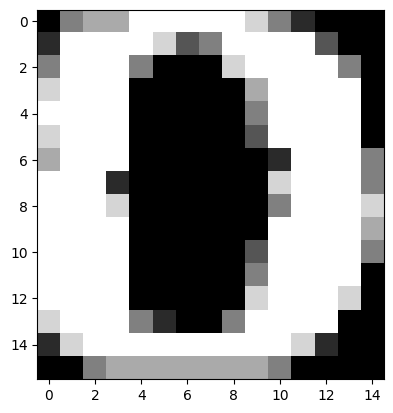

In [4]:
#Example to check it works
drawDigit(data[0])

In [5]:
# TODO note from MAtisse: there are build in functions for this,  better and more neat than this TODO
# also does this split take into account the fact that the data is ordered?
Training_Data, Testing_Data = splitData(data, test_training_ratio = 0.2)

In [6]:
print(f"Shape Training Array: {Training_Data.shape}\nShape Test Array: {Testing_Data.shape}")

Shape Training Array: (1600, 16, 15)
Shape Test Array: (400, 16, 15)


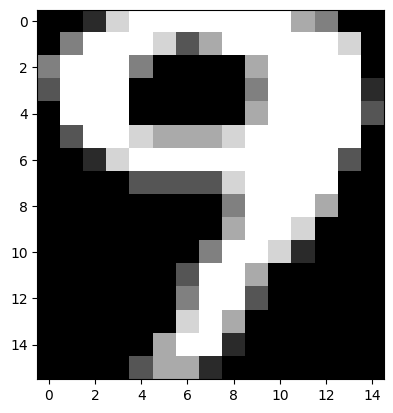

In [7]:
#Should be the same as before
drawDigit(Testing_Data[-1])

### K-Neighearest Neighbor Comparison

In [8]:
!pip install scikit-learn

You should consider upgrading via the '/home/matisse/Documents/Rug---Neural-Networks---Course-Project/bin/python -m pip install --upgrade pip' command.


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
# create the labels
labels = np.zeros(2000)

# assign the labels (0-9) to the first 200 instances of each digit
for i in range(10):
    labels[i*200:(i+1)*200] = i

# reshape the data to be 2D
data = data.reshape(2000, 16 * 15)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=69)

# first try k = 3
knn = KNeighborsClassifier(n_neighbors=3)



In [22]:
# train the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [23]:
# Predict on the test data
y_pred = knn.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[41  0  0  0  0  0  0  0  0  0]
 [ 0 43  0  0  0  1  0  0  0  0]
 [ 0  0 41  0  0  0  0  0  0  0]
 [ 0  0  0 39  0  0  0  0  0  0]
 [ 0  0  0  0 34  0  1  0  0  0]
 [ 0  0  0  0  0 41  0  0  0  0]
 [ 0  0  0  0  0  1 38  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0]
 [ 2  0  0  0  0  0  0  0 44  0]
 [ 0  0  0  0  0  0  0  0  0 40]]
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.98        41
         1.0       1.00      0.98      0.99        44
         2.0       1.00      1.00      1.00        41
         3.0       1.00      1.00      1.00        39
         4.0       1.00      0.97      0.99        35
         5.0       0.95      1.00      0.98        41
         6.0       0.97      0.97      0.97        39
         7.0       1.00      1.00      1.00        34
         8.0       1.00      0.96      0.98        46
         9.0       1.00      1.00      1.00        40

    accuracy                           0.99       400
   macro avg       

### CNN